**Instruksi Umum:**

1. Anda akan menggunakan dataset "Medical Cost Personal Datasets". Pastikan Anda telah mengunduh dataset ini.

2. Gunakan bahasa pemrograman Python dan library yang sesuai seperti NumPy, Pandas, Matplotlib dan Scikit-Learn untuk melakukan analisis regresi dan SVR.

**Tugas 1: Multiple Linear Regression**
1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

3. Lakukan feature scaling jika diperlukan.

4. Buat model multiple linear regression menggunakan Scikit-Learn.

5. Latih model pada data latih dan lakukan prediksi pada data uji.

6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load data insurance.csv
df = pd.read_csv('insurance.csv')


1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
df.shape

(1338, 7)

In [16]:
# Encode data dengan one hot encoding
df_encoded = pd.get_dummies(df,columns=['sex','smoker','region'])


In [17]:
df_encoded.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


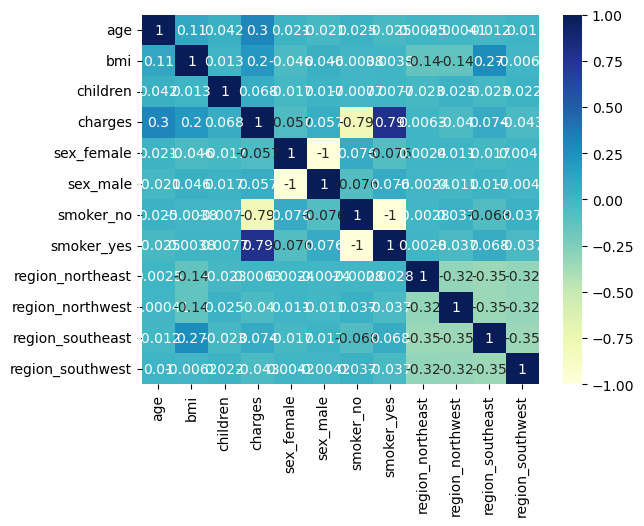

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
# visualisasi korelasi dengan heatmap
sns.heatmap(df_encoded.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
# Melakukan Feature Scaling untuk age, bmi, children

In [19]:
# Memisahkan data menjadi data feature dan data target

# Dari visualisasi diatas, ambil fitur yang memiliki korelasi tinggi dengan target
# smoker, bmi, age
X = df_encoded.drop(columns=['charges'])
y = df_encoded['charges']

X, y

(      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0      19  27.900         0        True     False      False        True   
 1      18  33.770         1       False      True       True       False   
 2      28  33.000         3       False      True       True       False   
 3      33  22.705         0       False      True       True       False   
 4      32  28.880         0       False      True       True       False   
 ...   ...     ...       ...         ...       ...        ...         ...   
 1333   50  30.970         3       False      True       True       False   
 1334   18  31.920         0        True     False       True       False   
 1335   18  36.850         0        True     False       True       False   
 1336   21  25.800         0        True     False       True       False   
 1337   61  29.070         0        True     False      False        True   
 
       region_northeast  region_northwest  region_southeast  region_southw

2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

In [20]:
# Membagi data menjadi data training dan data testing 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)


3. Lakukan feature scaling jika diperlukan.

4. Buat model multiple linear regression menggunakan Scikit-Learn.

In [21]:
# Membuat model multiple linear regression dengan scikit-learn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

# Prediksi nilai pada data pengujian
y_pred = model.predict(X_test)

# Menghitung Mean Squared Error (MSE) dan R-squared (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R²): {r2:.2f}')


Mean Squared Error (MSE): 37738366.03
R-squared (R²): 0.73
